<a href="https://colab.research.google.com/github/jnramirezg/medio_continuo/blob/main/codigo/02-analisis_viga_simplemente_apoyada_carga_uniforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Viga simplemente apoyada con carga uniformemente distribuida y sección rectangular

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2024-08-30 | Creando código|

En este programa analizamos con variables simbólicas la siguiente viga simplemente apoyada con carga uniformemente distribuida hacia abajo y sección rectangular mediante las teorías de Euler-Bernoulli y Timoshenko-Ehrenfest. Luego, se grafican cortantes, momentos, giros, deflexiones, esfuerzos normales y esfuerzos cortantes.

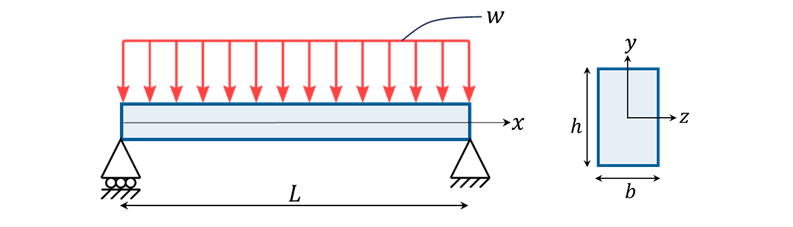

* Determinar computacional y simbólicamente con Python las funciones y los valores máximos/mínimos de $V(x)$, $M(x)$, $\theta(x)$ y $v(x)$ usando las teorías de Euler-Bernoulli y Timoshenko-Enhrenfest. Comparar los resultados.
* Si tenemos una viga de concreto con $f'c=21MPa$, $\nu=0.23$, $L=10m$, $w=30kN/m$ (hacia abajo), $b=0.4$ y $h=0.7m$. Graficar $V(x)$, $M(x)$, $\theta(x)$ y $v(x)$, así como los esfuerzos normal y cortante para todo punto $(x,y)$.

Importamos las librerías necesarias:

In [1]:
from sympy import symbols, integrate, solve, expand, simplify, lambdify
from numpy import meshgrid, linspace
import matplotlib.pyplot as plt

Definimos las variables simbólicas:

In [2]:
b, h, L, I, A = symbols("b, h, L, I, A")    # Geometría.
E, G, a = symbols("E, G, alpha")            # Constantes del material.
w = symbols("w")                            # Cargas.
x, y = symbols("x, y")                      # Variables de posición.
c1, c2, c3, c4 = symbols("c1, c2, c3, c4")  # Constantes de integración.

## (i)Cálculo de $V(x)$, $M(x)$, $\theta(x)$ y $v(x)$ usando Euler-Bernoulli

Usamos las siguientes ecuaciones de la viga de Euler-Bernoulli de la sección 9.9 del ````main.pdf````:

$$V(x) = \int q(x) dx + C_1$$

$$M(x) = \int V(x) dx + C_2$$

$$\theta(x) = \int \frac{M(x)}{EI} dx + C_3$$

$$v(x) = \int \theta(x) dx + C_4$$

In [3]:
q = -w                          # Carga constante hacia abajo.
V = integrate(q, x) + c1        # Fuerza cortante.
M = integrate(V, x) + c2        # Momento flector.
t = integrate(M/(E*I), x) + c3  # Ángulo de giro.
v = integrate(t, x) + c4        # Deflexión (desplazamiento vertical).

Consideramos las siguientes condiciones de frontera:

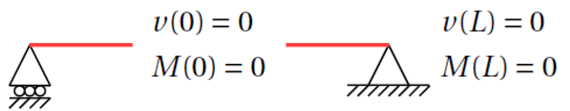

In [4]:
e1 = M.subs(x, 0) - 0  # M(0)=0 (El momento es cero en el apoyo izquierdo.)
e2 = M.subs(x, L) - 0  # M(L)=0 (El momento es cero en el apoyo derecho.)
e3 = v.subs(x, 0) - 0  # v(0)=0 (La deflexión es cero en el apoyo izquierdo.)
e4 = v.subs(x, L) - 0  # v(L)=0 (La deflexión es cero en el apoyo derecho.)

Calculamos las constantes de integración con las ecuaciones aportadas por las condiciones de frontera:

In [5]:
c = solve([e1, e2, e3, e4],[c1, c2, c3, c4])
c

{c1: L*w/2, c2: 0, c3: -L**3*w/(24*E*I), c4: 0}

Substituimos las constantes calculadas:

In [6]:
VEB = V.subs(c)
MEB = M.subs(c)
tEB = t.subs(c)
vEB = v.subs(c)

Finalmente, obtenemos las siguientes funciones:
$$V(x)=   -w x  + \frac{1}{2}wL$$

$$M(x)=  -\frac{1}{2}wx^{2}+ \frac{1}{2}wLx $$

$$\theta(x)= -\frac{1}{6EI} wx^{3}+ \frac{1}{4EI}wLx^{2}  -\frac{1}{24EI}wL^{3} $$

$$v(x)= -\frac{1}{24EI} wx^{4}+ \frac{1}{12EI}wLx^{3}  -\frac{1}{24EI}wL^{3}x $$

## (ii) Cálculo de $V(x)$, $M(x)$, $\theta(x)$ y $v(x)$ usando Timoshenko-Ehrenfest

Usamos las siguientes ecuaciones de la viga de Timoshenko-Ehrenfest de la sección 13.7 del ````main.pdf````:
$$V(x) = \int q(x) dx + C_1$$

$$M(x) = \int V(x) dx + C_2$$

$$\theta(x) = \int \frac{M(x)}{EI} dx + C_3$$

$$v(x) = \int \left( \theta(x) - \frac{V(x)}{a G(x) A(x)} \right) dx + C_4$$

In [7]:
q = -w                                # Carga constante hacia abajo.
V = integrate(q, x) + c1              # Fuerza cortante.
M = integrate(V, x) + c2              # Momento flector.
t = integrate(M/(E*I), x) + c3        # Ángulo de giro.
v = integrate(t - V/(a*G*A), x) + c4  # Deflexión (desplazamiento vertical).

Consideramos las siguientes condiciones de frontera:

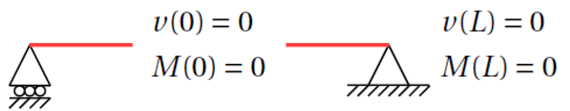

In [8]:
e1 = M.subs(x, 0) - 0  # M(0)=0 (El momento es cero en el apoyo izquierdo.)
e2 = M.subs(x, L) - 0  # M(L)=0 (El momento es cero en el apoyo derecho.)
e3 = v.subs(x, 0) - 0  # v(0)=0 (La deflexión es cero en el apoyo izquierdo.)
e4 = v.subs(x, L) - 0  # v(L)=0 (La deflexión es cero en el apoyo derecho.)

Calculamos las constantes de integración con las ecuaciones aportadas por las condiciones de frontera:

In [9]:
c = solve([e1, e2, e3, e4],[c1, c2, c3, c4])
c

{c1: L*w/2, c2: 0, c3: -L**3*w/(24*E*I), c4: 0}

Substituimos las constantes calculadas:

In [10]:
VTE = V.subs(c)
MTE = M.subs(c)
tTE = t.subs(c)
vTE = v.subs(c)

Finalmente, obtenemos las siguientes funciones:
$$V(x)=   -w x  + \frac{1}{2}wL$$

$$M(x)=  -\frac{1}{2}wx^{2}+ \frac{1}{2}wLx $$

$$\theta(x)= -\frac{1}{6EI} wx^{3}+ \frac{1}{4EI}wLx^{2}  -\frac{1}{24EI}wL^{3} $$

$$v(x)= -\frac{1}{24EI} wx^{4}+ \frac{1}{12EI}wLx^{3}  -\frac{1}{24EI}wL^{3}x + \frac{1}{2\alpha GA}wx^2- \frac{1}{2\alpha GA}wxL$$

## (iii) Comparación EB y TE

### Fuerza cortante $V(x)$:
Si el resultado de la resta da cero, entonces las expresiones son iguales en las teorías EB y TE.

In [11]:
VEB-VTE

0

### Momento Flector $M(x)$:
Si el resultado de la resta da cero, entonces las expresiones son iguales en las teorías EB y TE.

In [12]:
MEB-MTE

0

### Ángulo de giro $\theta(x)$:
Si el resultado de la resta da cero, entonces las expresiones son iguales en las teorías EB y TE.

In [13]:
tEB-tTE

0

### Deflexión $v(x)$:
Es posible que sea necesario usar ````sympy.simplify````.

In [14]:
simplify(vEB-vTE)

w*x*(L - x)/(2*A*G*alpha)

En sistesis,

en EB: $$v(x)= -\frac{1}{24EI} wx^{4}+ \frac{1}{12EI}wLx^{3}  -\frac{1}{24EI}wL^{3}x $$

y en TE: $$v(x)= -\frac{1}{24EI} wx^{4}+ \frac{1}{12EI}wLx^{3}  -\frac{1}{24EI}wL^{3}x \color{red}{+ \frac{1}{2\alpha GA}wx^2- \frac{1}{2\alpha GA}wxL}$$

## (iv) Análisis de las funciones

### Fuerza cortante $V(x)$ (Igual para EB y TE).

#### Puntos cero

In [15]:
x_V0 = solve(VEB, x)  # Al solucionar, se obtienen las raíces o puntos x en los que la función es cero.
x_V0

[L/2]

Se almacenan las raíces que están dentro del intervalo de la viga $[0, L]$:

In [16]:
x_V0_1 = x_V0[0]

$$\boxed{V\left(\frac{L}{2}\right)=0}$$

#### Puntos máximos

Los máximo/mínimo de una recta entán en los extremos del intervalo, es decir, en $x=0$ y $x=L$:

In [17]:
VEB.subs(x, 0)

L*w/2

In [18]:
VEB.subs(x, L)

-L*w/2

$$\boxed{V(0)=\frac{wl}{2}}$$
$$\boxed{V(L)=-\frac{wl}{2}}$$

### Momento flector $M(x)$ (Igual para EB y TE).

#### Puntos cero

In [19]:
x_M0 = solve(MEB, x)  # Al solucionar, se obtienen las raíces o puntos x en los que la función es cero.
x_M0

[0, L]

Se almacenan las raíces que están dentro del intervalo de la viga $[0, L]$:

In [20]:
x_M0_1 = x_M0[0]
x_M0_2 = x_M0[1]

$$\boxed{M(0)=0}$$
$$\boxed{M(L)=0}$$

Consistentes con las condiciones de frontera.

#### Puntos máximos

El máximo/mínimo de $M(x)$ está en las raices de $V(x)$, ya que se cumple que $V(x)=\frac{dM(x)}{dx}$, es decir, en $x=\frac{L}{2}$:

In [21]:
MEB.subs(x, x_V0_1)

L**2*w/8

$$\boxed{M\left(\frac{L}{2}\right)=\frac{wL^2}{8}}$$

### Ángulo de giro $\theta(x)$ (Igual para EB y TE).

#### Puntos cero

In [22]:
x_t0 = solve(tEB, x) # Al solucionar, se obtienen las raíces o puntos x en los que la función es cero.
x_t0

[L/2, L/2 + sqrt(3)*L/2, -sqrt(3)*L/2 + L/2]

Se almacenan las raíces que están dentro del intervalo de la viga $[0, L]$:

In [23]:
x_t0_1 = x_t0[0]

$$\boxed{\theta\left(\frac{L}{2}\right)=0}$$

#### Puntos máximos

Los máximo/mínimo de $\theta(x)$ está en las raices de $M(x)$, ya que se cumple que $M(x)=\frac{d\theta(x)}{dx}EI$, es decir, en $x=0$ y $x=L$:

In [24]:
tEB.subs(x, x_M0_1)

-L**3*w/(24*E*I)

In [25]:
tEB.subs(x, x_M0_2)

L**3*w/(24*E*I)

$$\boxed{\theta(0)=-\frac{wL^3}{24EI}}$$
$$\boxed{\theta(L)=\frac{wL^3}{24EI}}$$

### Deflexión $v(x)$

#### Puntos cero

In [26]:
x_v0 = solve(vEB, x) # Al solucionar, se obtienen las raíces o puntos x en los que la función es cero.
x_v0

[0, L, L/2 + sqrt(5)*L/2, -sqrt(5)*L/2 + L/2]

$$\boxed{v(0)=0}$$
$$\boxed{v(L)=0}$$

Consistentes con las condiciones de frontera.

#### Puntos máximos

El máximo/mínimo de $v(x)$ está en las raices de $\theta(x)$, ya que se cumple que $\theta(x)=\frac{dv(x)}{dx}$, es decir, en $x=\frac{L}{2}$:

In [27]:
vEB.subs(x, x_t0_1)  # En la teoría EB.

-5*L**4*w/(384*E*I)

In [28]:
simplify(vTE.subs(x,x_t0_1))  # En la teoría TE.

-5*L**4*w/(384*E*I) - L**2*w/(8*A*G*alpha)

En sistesis,

en EB: $$v\left(\frac{L}{2}\right)= -\frac{5wL^4}{384EI} $$

y en TE: $$v\left(\frac{L}{2}\right)= -\frac{5wL^4}{384EI} \color{red}{-\frac{wL^2}{8\alpha GA}}$$

## (v) Gráficas con datos numéricos

#### Datos de entrada

Supongamos que la viga tiene las siguientes propiedades:

**Nota:** En algunos casos ponemos el subindice ````i```` para diferenciar de las variables simbólicas.

In [29]:
# Geometría.
bi  = 0.4         # [m] Ancho de la viga de sección rectangular.
hi  = 0.7         # [m] Alto de la viga de sección rectangular.
Li = 10           # [m] Longuitud de la viga.
Ii = bi*hi**3/12  # [m4] Momento de inercia de una sección rectangular.
Ai = bi*hi        # [m2] Área de la viga de sección rectangular.

# Material
fpc = 21                   # [MPa] Resitencia máxima del concreto f'c.
Ei = 4700*(fpc)**0.5       # [MPa] Según la sección C.8.5 de la NSR-10.
Ei = Ei*1000               # [kPa] Cambio de unidades.
nu = 0.23                  # Coeficiente de Poisson.
Gi = Ei/(2*(1+nu))         # [kPa] Módulo de cortante.
ai = 10*(1+nu)/(12+11*nu)  # Factor de reducción de área para una sección cuadrada según la tabla 13.1 del "main.pdf"

# Cargas.
wi = 30 # Hacia abajo, pero ya se había asumido el signo en la deducción.

#### Funciones

##### Función para graficar cortantes, momentos, giros y deflexiones
Definimos una función para graficar cortantes, momentos, ángulos de giro y deflexiones:

In [30]:
def grafico_funcion_viga(x, f, titulo, momento=False):
    plt.figure(figsize=(10, 3))                   # Tamaño de la gráfica.
    plt.plot(x, f, 'r')                           # Gráfica de la función.
    plt.fill_between(x, f, color="lavenderblush") # Sombreado de la gráfica.
    plt.plot([0, max(x)], [0, 0], 'k')            # Eje x.
    plt.xlabel("Posición [m]")                    # Título del eje x.
    plt.ylabel(titulo)                            # Título del eje y.
    plt.xlim(0, max(x))                           # Límites en x del gráfico.
    if momento==True:             # Condición si la función es M(x).
        plt.gca().invert_yaxis()  # Invierte el eje y (función).
    plt.show()

##### Función para graficar esfuerzos normales y cortantes:

In [31]:
def dibujar_esf_def(titulo, f, x, y):
    curvas = linspace(f.min(), f.max(), 20)  # Definimos 20 curvas de nivel.
    plt.figure(figsize=(12, 3))
    im = plt.pcolormesh(x, y, f, vmin=f.min(), vmax=f.max(), shading='gouraud', cmap='jet_r')
    # Se grafica la función con colores.
    plt.contour(x, y, f, levels=curvas, colors='k', linestyles='-', linewidths=0.7)
    plt.colorbar(im, aspect=5)       # Se crea una barra de color lateral.
    plt.ylabel(titulo, fontsize=18)  # Título.
    plt.xlim(x.min(), x.max())       # Límites en x del gráfico.
    plt.ylim(y.min(), y.max())       # Límites en y del gráfico.
    plt.show()

#### Cálculos

Definimos un conjuto de puntos de posición para evaluar las funciones de los esfuerzos de tamaño (50, 25):

In [32]:
xi, yi = meshgrid(linspace(   0,   Li, 50),  # Dirección x.
                linspace(-hi/2, hi/2, 25))   # Dirección y, va de -h/2 hasta h/2 porque el eje neutro está en y=0.

In [33]:
xg = xi[0]  # Extraemos la información para funciones que sólo dependen de x.

Substituimos los valores simbólicos con los valores numéricos del ejemplo:

In [34]:
V    = VEB.subs([(L,Li), (w,wi)])  # Cortantes.
M    = MEB.subs([(L,Li), (w,wi)])  # Momentos.
t    = tEB.subs([(L,Li), (w,wi), (E,Ei), (I, Ii)])  # Giros.
vEBg = vEB.subs([(L,Li), (w,wi), (E,Ei), (I, Ii)])  # Deflexiones para EB.
vTEg = vTE.subs([(L,Li), (w,wi), (E,Ei), (I, Ii)])  # Deflexiones para TE.

Usamos la función ````simpy.lambdify```` para convertir las expresiones simbólicas en funciones evaluables en varios puntos numéricos:

In [35]:
V    = lambdify(x,    V, "numpy")
M    = lambdify(x,    M, "numpy")
t    = lambdify(x,    t, "numpy")
vEBg = lambdify(x, vEBg, "numpy")
vTEg = lambdify(x, vTEg, "numpy")

Calculamos los esfuerzos:

In [36]:
sx = -M(xi)*yi/Ii                   # [kN/m2] Esfuerzo normal.
txy = V(xi)*(yi**2-hi**2/4)/(2*Ii)  # [kN/m2] Esfuerzo cortante.

#### Gráfica de fuerza cortante $V(x)$

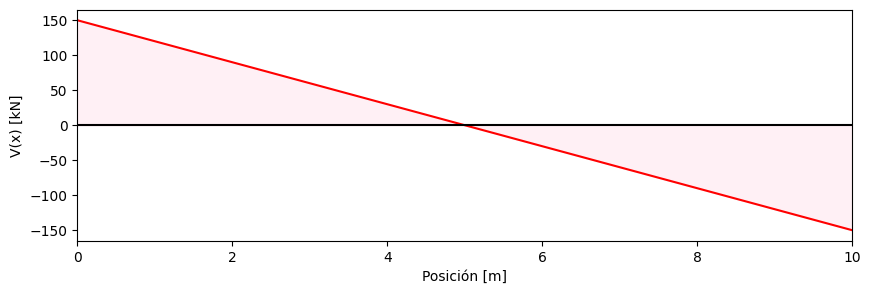

In [37]:
grafico_funcion_viga(xg, V(xg), "V(x) [kN]")

#### Gráfica de momento flector $M(x)$

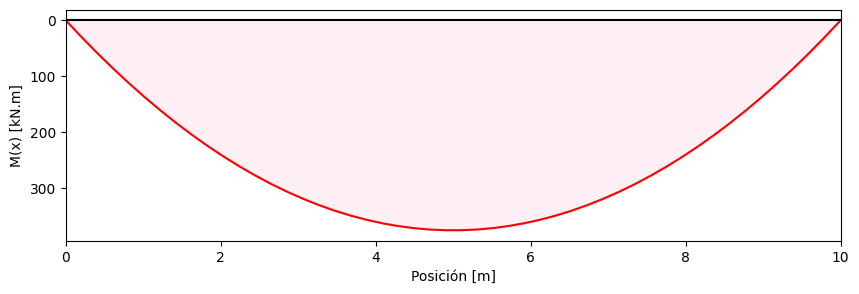

In [38]:
grafico_funcion_viga(xg, M(xg), "M(x) [kN.m]", momento=True)

#### Gráfica de ángulo de giro $\theta(x)$

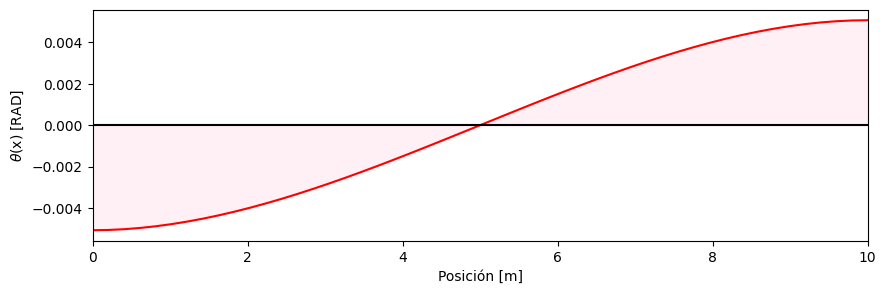

In [39]:
grafico_funcion_viga(xg, t(xg), r"$\theta$(x) [RAD]")

#### Gráfica de desplazamientos verticales (deflexiones) $v(x)$

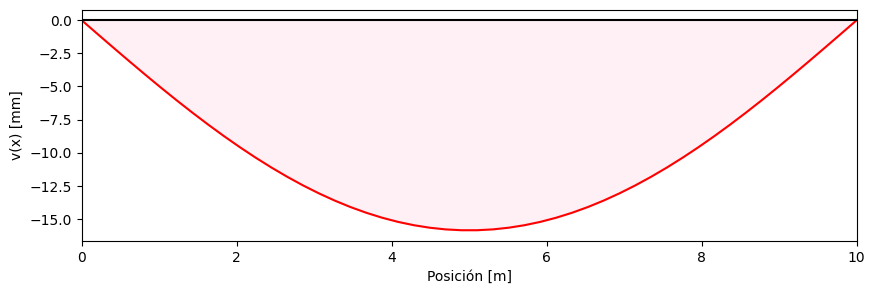

In [40]:
grafico_funcion_viga(xg, vEBg(xg)*1000, "v(x) [mm]")

#### Gráfica de esfuerzos normales $\sigma_x$:

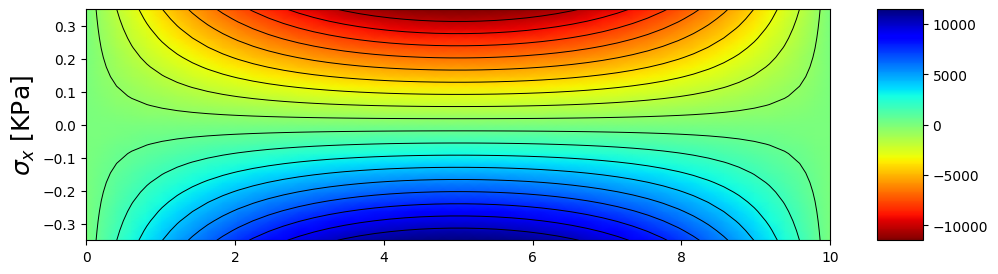

In [41]:
dibujar_esf_def(r"$\sigma_x$ [KPa]", sx, xi, yi)

#### Gráfica de esfuerzos cortantes $\tau_{xy}$:

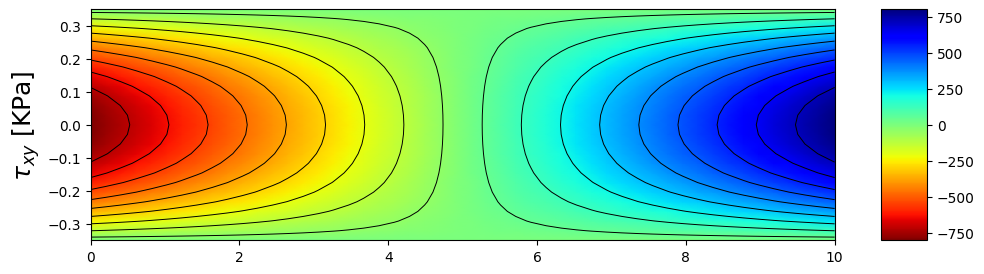

In [42]:
dibujar_esf_def(r"$\tau_{xy}$ [KPa]", txy, xi, yi)

#### Comparación de las deflexiones para EB y TE:

<lambdifygenerated-6>:2: RuntimeWarning: divide by zero encountered in divide
  return (5.0596371464824e-6*x**2/h + 3.37309143098827e-7*x*(-150 - 5161.73434273916/h**2)/h - 1.74110018805313e-6*x**4/h**3 + 3.48220037610626e-5*x**3/h**3)/(-1.74110018805313e-6*x**4/h**3 + 3.48220037610626e-5*x**3/h**3 - 0.00174110018805313*x/h**3)
<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in divide
  return (5.0596371464824e-6*x**2/h + 3.37309143098827e-7*x*(-150 - 5161.73434273916/h**2)/h - 1.74110018805313e-6*x**4/h**3 + 3.48220037610626e-5*x**3/h**3)/(-1.74110018805313e-6*x**4/h**3 + 3.48220037610626e-5*x**3/h**3 - 0.00174110018805313*x/h**3)


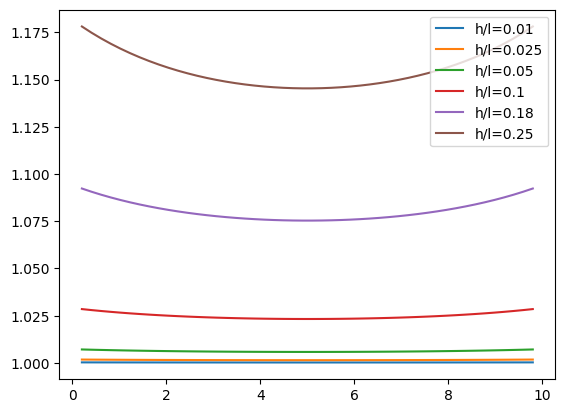

In [43]:
r_EB_TE = (vTE/vEB).subs([(L,Li), (w,wi), (E,Ei), (I,bi*h**3/12), (A, bi*h), (G,Gi), (a, ai)])
r_EB_TE = lambdify([x, h],r_EB_TE, "numpy")

for i in [0.01, 0.025 , 0.05, 0.10, 0.18, 0.25]:
    plt.plot(xg, r_EB_TE(xg, i*Li), label=f"h/l={i}")
plt.legend()
plt.show()